# 연속데이터예측_아이오와에임스지역_집값예측_train

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("./06deep_learning/data/house_train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

결측값 제거

In [6]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageQual        5.547945
GarageFinish      5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageCond        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtCond          2.534247
BsmtQual          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Condition2        0.000000
BldgType          0.000000
Neighborhood      0.000000
LandSlope         0.000000
LotConfig         0.000000
Condition1        0.000000
LandContour       0.000000
LotShape          0.000000
Street            0.000000
LotArea           0.000000
MSSubClass        0.000000
MSZoning          0.000000
Id                0.000000
Utilities         0.000000
HouseStyle        0.000000
Foundation        0.000000
ExterQual         0.000000
ExterCond         0.000000
B

In [10]:
# 결측값 비율 초과된 컬럼들만
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1)

KeyError: "['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'] not found in axis"

In [ ]:
missing_cols = (data.isna().sum() / len(data) * 100).sort_values(ascending=False).index

In [ ]:
missing_cols = (data.isna().sum() / len(data) * 100).sort_values(ascending=False).index

In [ ]:
missing_cols = ['LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'Electrical']

In [ ]:
data['GarageQual'].dtype

In [11]:
for col in missing_cols:
#     print(col, data[col].dtype)
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].median())

In [12]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

이상값 탐지

In [13]:
# !pip install seaborn

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

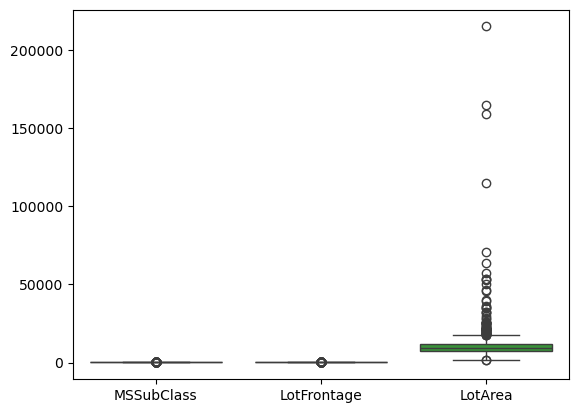

In [15]:
sns.boxplot(data.iloc[:, 1:5])

In [16]:
len(data.columns)

75

<Axes: >

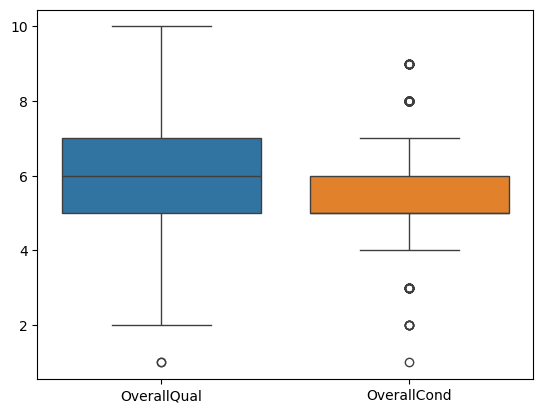

In [17]:
sns.boxplot(data.iloc[:, 16:18])

<Axes: >

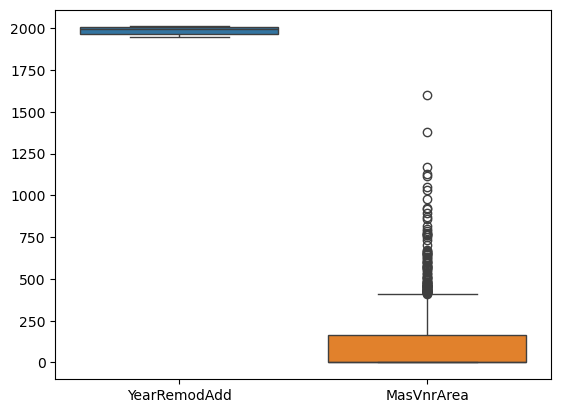

In [18]:
sns.boxplot(data.iloc[:, 19:25])

In [19]:
data2 = data.copy() # 얕은 복사
data3 = data.copy() # 얕은 복사 원래있던 데이터를 참조하지 않게끔.

In [20]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [21]:
X = data.drop(["SalePrice", 'Id'], axis=1)
y = data['SalePrice']

In [ ]:
X.head(2)

In [ ]:
y

In [33]:
X = pd.get_dummies(X)
X.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,False,False,False,True,False,False,True,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,False,False,False,True,False,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


In [34]:
X = X.astype('float32')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [35]:
#홀드아웃 - 사이즈 7:3 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# 이상값 영향 조금이라도줄이기 위해 MinMax가아닌 RobustScaler
rs = RobustScaler()
rs_X_train = rs.fit_transform(X_train)
rs_X_valid = rs.transform(X_valid)


In [38]:
# RobustScaler 잡립에 저장
import joblib
joblib.dump(rs, "./06deep_learning/model/iowa_rs.joblib")

['./06deep_learning/model/iowa_rs.joblib']

# 출력층 Dense(1) 
# model.compile(loss='mean_squared_error', metrics='mse')

In [29]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError

2025-05-23 09:48:12.793188: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-23 09:48:11.997906: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747961292.113735    1421 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747961292.147109    1421 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747961292.400010    1421 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [39]:
inputs = Input(shape=(rs_X_train.shape[1], ))
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x) 
outputs = Dense(1)(x) 
base_model = Model(inputs=inputs, outputs=outputs)
base_model.summary()


I0000 00:00:1747961443.143738    1421 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1347 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 266)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         8,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,089 (35.50 KB)

 Trainable params: 9,089 (35.50 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
base_model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_path = "./model/iowa_base_model_best.keras"
check_point = ModelCheckpoint(filepath=model_path, monitor='val_loss', save_best_only=True, verbose=1)
base_model_history = base_model.fit(rs_X_train, y_train, epochs=1000, batch_size=32,
                                   validation_data=(rs_X_valid, y_valid),
                                   callbacks=[early_stop, check_point],
                                   verbose=1)

Epoch 1/1000


I0000 00:00:1747961446.755758    1818 service.cc:152] XLA service 0x7f7f600038e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747961446.755793    1818 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-05-23 09:50:46.809855: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747961447.043389    1818 cuda_dnn.cc:529] Loaded cuDNN version 90300


23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40348860416.0000 - root_mean_squared_error: 200755.9219

I0000 00:00:1747961448.431748    1818 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 40008601600.0000 - root_mean_squared_error: 199934.2812
Epoch 1: val_loss improved from inf to 39374106624.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 39974707200.0000 - root_mean_squared_error: 199851.6094 - val_loss: 39374106624.0000 - val_root_mean_squared_error: 198429.0938
Epoch 2/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40184438784.0000 - root_mean_squared_error: 200413.1719
Epoch 2: val_loss improved from 39374106624.00000 to 39365550080.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 39900766208.0000 - root_mean_squared_error: 199709.5938 - val_loss: 39365550080.0000 - val_root_mean_squared_error: 198407.5312
Epoch 3/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39717933056.0000 - root_mean_squared_error: 199240.9062
Epoch 3: val_loss improved from 39365550080.00000 to 39350718464.00000, saving m

Epoch 18/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35372675072.0000 - root_mean_squared_error: 188024.0781
Epoch 18: val_loss improved from 36177633280.00000 to 35837243392.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 35267563520.0000 - root_mean_squared_error: 187754.6719 - val_loss: 35837243392.0000 - val_root_mean_squared_error: 189307.2812
Epoch 19/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34836017152.0000 - root_mean_squared_error: 186614.1875
Epoch 19: val_loss improved from 35837243392.00000 to 35403845632.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 34850004992.0000 - root_mean_squared_error: 186660.3281 - val_loss: 35403845632.0000 - val_root_mean_squared_error: 188159.0938
Epoch 20/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34485411840.0000 - root_mean_squared_error: 185681.2656
Epoch 20: val_loss improved from 35403845632.00000 

Epoch 35/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28416835584.0000 - root_mean_squared_error: 168460.5000
Epoch 35: val_loss improved from 30461468672.00000 to 30132799488.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28553371648.0000 - root_mean_squared_error: 168886.9062 - val_loss: 30132799488.0000 - val_root_mean_squared_error: 173588.0156
Epoch 36/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28961079296.0000 - root_mean_squared_error: 170100.3125
Epoch 36: val_loss improved from 30132799488.00000 to 29691174912.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28925542400.0000 - root_mean_squared_error: 170005.2031 - val_loss: 29691174912.0000 - val_root_mean_squared_error: 172311.2656
Epoch 37/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27819749376.0000 - root_mean_squared_error: 166611.2188
Epoch 37: val_loss improved from 29691174912.00000 

Epoch 52/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25917872128.0000 - root_mean_squared_error: 160909.0312
Epoch 52: val_loss improved from 24953090048.00000 to 24587251712.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 25669169152.0000 - root_mean_squared_error: 160144.4375 - val_loss: 24587251712.0000 - val_root_mean_squared_error: 156803.2188
Epoch 53/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23288358912.0000 - root_mean_squared_error: 152537.9844
Epoch 53: val_loss improved from 24587251712.00000 to 24293062656.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23544285184.0000 - root_mean_squared_error: 153383.3906 - val_loss: 24293062656.0000 - val_root_mean_squared_error: 155862.3125
Epoch 54/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21709463552.0000 - root_mean_squared_error: 147142.0469
Epoch 54: val_loss improved from 24293062656.0000

Epoch 69/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19893700608.0000 - root_mean_squared_error: 141019.1406
Epoch 69: val_loss improved from 19698558976.00000 to 19342813184.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19853815808.0000 - root_mean_squared_error: 140881.1406 - val_loss: 19342813184.0000 - val_root_mean_squared_error: 139078.4375
Epoch 70/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19014318080.0000 - root_mean_squared_error: 137757.4844
Epoch 70: val_loss improved from 19342813184.00000 to 19008108544.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19230681088.0000 - root_mean_squared_error: 138554.2188 - val_loss: 19008108544.0000 - val_root_mean_squared_error: 137869.9062
Epoch 71/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18063804416.0000 - root_mean_squared_error: 134367.2656
Epoch 71: val_loss improved from 19008108544.0000

Epoch 86/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13994689536.0000 - root_mean_squared_error: 118257.9688
Epoch 86: val_loss improved from 13953127424.00000 to 13560128512.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14031694848.0000 - root_mean_squared_error: 118416.9688 - val_loss: 13560128512.0000 - val_root_mean_squared_error: 116447.9609
Epoch 87/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14714422272.0000 - root_mean_squared_error: 121217.8516
Epoch 87: val_loss improved from 13560128512.00000 to 13216599040.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 14468301824.0000 - root_mean_squared_error: 120205.3359 - val_loss: 13216599040.0000 - val_root_mean_squared_error: 114963.4688
Epoch 88/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14237169664.0000 - root_mean_squared_error: 119290.6406
Epoch 88: val_loss improved from 13216599040.0000

Epoch 103/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10487065600.0000 - root_mean_squared_error: 102295.1797
Epoch 103: val_loss improved from 8162782208.00000 to 7862192128.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10463833088.0000 - root_mean_squared_error: 102182.9609 - val_loss: 7862192128.0000 - val_root_mean_squared_error: 88669.0000
Epoch 104/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8734114816.0000 - root_mean_squared_error: 93412.4766
Epoch 104: val_loss improved from 7862192128.00000 to 7597470208.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8711482368.0000 - root_mean_squared_error: 93298.8203 - val_loss: 7597470208.0000 - val_root_mean_squared_error: 87163.4688
Epoch 105/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8451776000.0000 - root_mean_squared_error: 91814.2578
Epoch 105: val_loss improved from 7597470208.00000 to 7340

28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5428925440.0000 - root_mean_squared_error: 73626.0781
Epoch 120: val_loss improved from 4458514944.00000 to 4283838208.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5545820672.0000 - root_mean_squared_error: 74401.1797 - val_loss: 4283838208.0000 - val_root_mean_squared_error: 65451.0352
Epoch 121/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6346165760.0000 - root_mean_squared_error: 79479.0234
Epoch 121: val_loss improved from 4283838208.00000 to 4146673664.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6303278592.0000 - root_mean_squared_error: 79228.2109 - val_loss: 4146673664.0000 - val_root_mean_squared_error: 64394.6719
Epoch 122/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6656883200.0000 - root_mean_squared_error: 81378.0703
Epoch 122: val_loss improved from 4146673664.00000 to 4037399808.00000, savin

26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5116654592.0000 - root_mean_squared_error: 71429.6172
Epoch 137: val_loss improved from 2930996992.00000 to 2846789632.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5132632576.0000 - root_mean_squared_error: 71562.0703 - val_loss: 2846789632.0000 - val_root_mean_squared_error: 53355.3164
Epoch 138/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4937584128.0000 - root_mean_squared_error: 70093.7344
Epoch 138: val_loss improved from 2846789632.00000 to 2828678656.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4961455104.0000 - root_mean_squared_error: 70270.8906 - val_loss: 2828678656.0000 - val_root_mean_squared_error: 53185.3242
Epoch 139/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5846899712.0000 - root_mean_squared_error: 76347.9375
Epoch 139: val_loss improved from 2828678656.00000 to 2781578240.00000, savin

Epoch 155/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4281589504.0000 - root_mean_squared_error: 65282.4883
Epoch 155: val_loss improved from 2417000192.00000 to 2404473856.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4367106560.0000 - root_mean_squared_error: 65917.2812 - val_loss: 2404473856.0000 - val_root_mean_squared_error: 49035.4336
Epoch 156/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6789268992.0000 - root_mean_squared_error: 82141.8359
Epoch 156: val_loss improved from 2404473856.00000 to 2395380992.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6654465024.0000 - root_mean_squared_error: 81318.0234 - val_loss: 2395380992.0000 - val_root_mean_squared_error: 48942.6289
Epoch 157/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4951836672.0000 - root_mean_squared_error: 70263.1953
Epoch 157: val_loss improved from 2395380992.00000 to 234757376

Epoch 173/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6106782720.0000 - root_mean_squared_error: 77930.6250
Epoch 173: val_loss improved from 2223742720.00000 to 2207278336.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5816903168.0000 - root_mean_squared_error: 76026.8203 - val_loss: 2207278336.0000 - val_root_mean_squared_error: 46981.6797
Epoch 174/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4485481984.0000 - root_mean_squared_error: 66820.6797
Epoch 174: val_loss improved from 2207278336.00000 to 2203730688.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4559771648.0000 - root_mean_squared_error: 67408.1484 - val_loss: 2203730688.0000 - val_root_mean_squared_error: 46943.9102
Epoch 175/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4552502784.0000 - root_mean_squared_error: 67413.1562
Epoch 175: val_loss did not improve from 2203730688.00000
32/3

Epoch 192/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4132501760.0000 - root_mean_squared_error: 64241.0000
Epoch 192: val_loss did not improve from 2129289728.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4193835264.0000 - root_mean_squared_error: 64716.5234 - val_loss: 2146247936.0000 - val_root_mean_squared_error: 46327.6172
Epoch 193/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4694014464.0000 - root_mean_squared_error: 68449.2891
Epoch 193: val_loss improved from 2129289728.00000 to 2118848128.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4714339840.0000 - root_mean_squared_error: 68606.2031 - val_loss: 2118848128.0000 - val_root_mean_squared_error: 46030.9453
Epoch 194/1000
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4601392128.0000 - root_mean_squared_error: 67779.8828
Epoch 194: val_loss improved from 2118848128.00000 to 2113573888.00000, saving model to ./model/iowa_base_model_best.keras
32/3

Epoch 211/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4515784192.0000 - root_mean_squared_error: 67093.3438
Epoch 211: val_loss did not improve from 2038637952.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4498797056.0000 - root_mean_squared_error: 66971.3672 - val_loss: 2048419456.0000 - val_root_mean_squared_error: 45259.4688
Epoch 212/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4287222272.0000 - root_mean_squared_error: 65268.7070
Epoch 212: val_loss did not improve from 2038637952.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4445955584.0000 - root_mean_squared_error: 66462.5312 - val_loss: 2073340800.0000 - val_root_mean_squared_error: 45533.9531
Epoch 213/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3778252544.0000 - root_mean_squared_error: 61434.5781
Epoch 213: val_loss improved from 2038637952.00000 to 2029328512.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3862043904.0000 - root_

In [41]:
pred = base_model.predict(rs_X_valid)
pred = pd.DataFrame(pred, columns=['pred'])
pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


,pred
0,120127.453125
1,266373.062500
2,83085.328125
3,124757.765625
4,262497.656250
...,...
433,82446.304688
434,111257.218750
435,162719.359375
436,142033.171875


In [42]:
y_valid = pd.DataFrame(y_valid)
y_valid_df = y_valid.reset_index(drop=True)
final_result = y_valid_df.join(pred)
final_result

,SalePrice,pred
0,154500,120127.453125
1,325000,266373.062500
2,115000,83085.328125
3,159000,124757.765625
4,315500,262497.656250
...,...,...
433,139000,82446.304688
434,126175,111257.218750
435,205950,162719.359375
436,110000,142033.171875


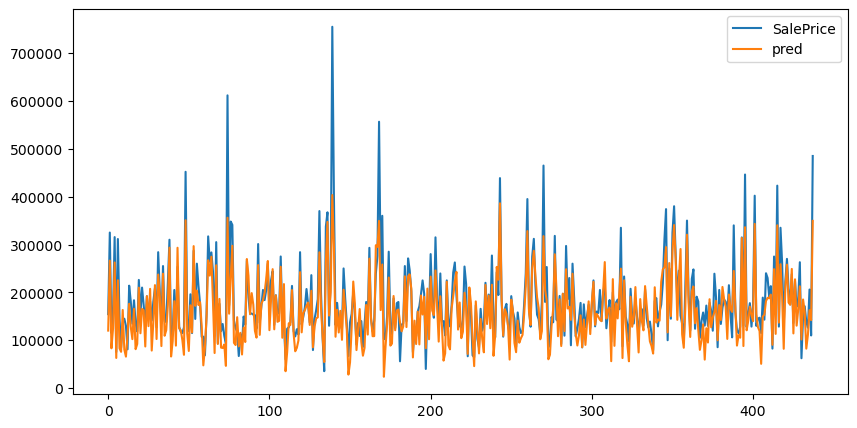

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2092987264.0000 - root_mean_squared_error: 45637.8789
[1977683968.0, 44471.16015625]


In [43]:
plt.figure(figsize=(10,5))
plt.plot(final_result['SalePrice'], label='SalePrice')
plt.plot(final_result['pred'], label='pred')
plt.legend()
plt.show()
print(base_model.evaluate(rs_X_valid, y_valid))

# 많은 컬럼 중에 어떤 컬럼을 선택? 266개
* 컬럼의 상관분석을 통해 타겟 변수(종속변수)와 상관도가 높은 컬럼만 선택
* 트리계열 알고리즘을 사용해 분석 후 중요한 변수만 추출해서 재분석

In [ ]:
data2

In [44]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [45]:
data2.drop('Id', axis=1, inplace=True)

In [46]:
data2 = pd.get_dummies(data2)
data2.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


상관분석

In [ ]:
# data2['SalePrice']

In [47]:
corr_rate = data2.corr(method='spearman')['SalePrice'].sort_values(ascending=False)

In [48]:
new_cols1 = corr_rate.head(15).index
new_cols1

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt',
       'GarageArea', 'FullBath', 'TotalBsmtSF', '1stFlrSF', 'ExterQual_Gd',
       'YearRemodAdd', 'GarageYrBlt', 'Foundation_PConc', 'TotRmsAbvGrd',
       'Fireplaces'],
      dtype='object')

In [49]:
new_cols2 = corr_rate.tail(4).index
new_cols2

Index(['KitchenQual_TA', 'BsmtQual_TA', 'GarageFinish_Unf', 'ExterQual_TA'], dtype='object')

In [50]:
final_cols = list(new_cols1) + list(new_cols2)
final_cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 'GarageArea',
 'FullBath',
 'TotalBsmtSF',
 '1stFlrSF',
 'ExterQual_Gd',
 'YearRemodAdd',
 'GarageYrBlt',
 'Foundation_PConc',
 'TotRmsAbvGrd',
 'Fireplaces',
 'KitchenQual_TA',
 'BsmtQual_TA',
 'GarageFinish_Unf',
 'ExterQual_TA']

In [52]:
data2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [53]:
final_df = data2[final_cols]

In [54]:
final_df

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,GarageYrBlt,Foundation_PConc,TotRmsAbvGrd,Fireplaces,KitchenQual_TA,BsmtQual_TA,GarageFinish_Unf,ExterQual_TA
0,208500,7,1710,2,2003,548,2,856,856,True,2003,2003.0,True,8,0,False,False,False,False
1,181500,6,1262,2,1976,460,2,1262,1262,False,1976,1976.0,False,6,1,True,False,False,True
2,223500,7,1786,2,2001,608,2,920,920,True,2002,2001.0,True,6,1,False,False,False,False
3,140000,7,1717,3,1915,642,1,756,961,False,1970,1998.0,False,7,1,False,True,True,True
4,250000,8,2198,3,2000,836,2,1145,1145,True,2000,2000.0,True,9,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,1999,460,2,953,953,False,2000,1999.0,True,7,1,True,False,False,True
1456,210000,6,2073,2,1978,500,2,1542,2073,False,1988,1978.0,False,7,2,True,False,True,True
1457,266500,7,2340,1,1941,252,2,1152,1188,False,2006,1941.0,False,9,2,False,True,False,False
1458,142125,5,1078,1,1950,240,1,1078,1078,False,1996,1950.0,False,5,0,False,True,True,True


In [55]:
final_df.corr(method='spearman')

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,GarageYrBlt,Foundation_PConc,TotRmsAbvGrd,Fireplaces,KitchenQual_TA,BsmtQual_TA,GarageFinish_Unf,ExterQual_TA
SalePrice,1.000000,0.809829,0.731310,0.690711,0.652682,0.649379,0.635957,0.602725,0.575408,0.574642,0.571159,0.563256,0.562287,0.532586,0.519247,-0.581803,-0.583512,-0.620915,-0.637785
OverallQual,0.809829,1.000000,0.603262,0.608756,0.647392,0.541552,0.576372,0.459915,0.408730,0.603276,0.557723,0.592010,0.586764,0.427806,0.420626,-0.581192,-0.590344,-0.556712,-0.673842
GrLivArea,0.731310,0.603262,1.000000,0.505094,0.288493,0.468211,0.658419,0.371026,0.494421,0.358133,0.282400,0.274625,0.332373,0.827874,0.480804,-0.376159,-0.338674,-0.362334,-0.413922
GarageCars,0.690711,0.608756,0.505094,1.000000,0.601519,0.853317,0.518310,0.455508,0.450580,0.443029,0.456245,0.564786,0.480178,0.386244,0.325520,-0.423255,-0.504415,-0.489950,-0.506121
YearBuilt,0.652682,0.647392,0.288493,0.601519,1.000000,0.528281,0.537420,0.427187,0.293363,0.593575,0.684388,0.845595,0.704001,0.176820,0.174655,-0.512248,-0.700552,-0.632360,-0.644772
GarageArea,0.649379,0.541552,0.468211,0.853317,0.528281,1.000000,0.444459,0.486685,0.489797,0.389859,0.398267,0.540450,0.400205,0.330549,0.264543,-0.393538,-0.413167,-0.449457,-0.453014
FullBath,0.635957,0.576372,0.658419,0.518310,0.537420,0.444459,1.000000,0.328036,0.366891,0.449973,0.431390,0.524892,0.480765,0.558665,0.268548,-0.430333,-0.513693,-0.450629,-0.485598
TotalBsmtSF,0.602725,0.459915,0.371026,0.455508,0.427187,0.486685,0.328036,1.000000,0.829292,0.313044,0.299042,0.319936,0.296406,0.233913,0.325687,-0.307764,-0.317195,-0.385379,-0.383999
1stFlrSF,0.575408,0.408730,0.494421,0.450580,0.293363,0.489797,0.366891,0.829292,1.000000,0.225259,0.240265,0.214327,0.179926,0.361777,0.394883,-0.268281,-0.215559,-0.326525,-0.294636
ExterQual_Gd,0.574642,0.603276,0.358133,0.443029,0.593575,0.389859,0.449973,0.313044,0.225259,1.000000,0.532550,0.569570,0.586748,0.212665,0.181413,-0.617598,-0.541969,-0.483784,-0.906121


<Axes: >

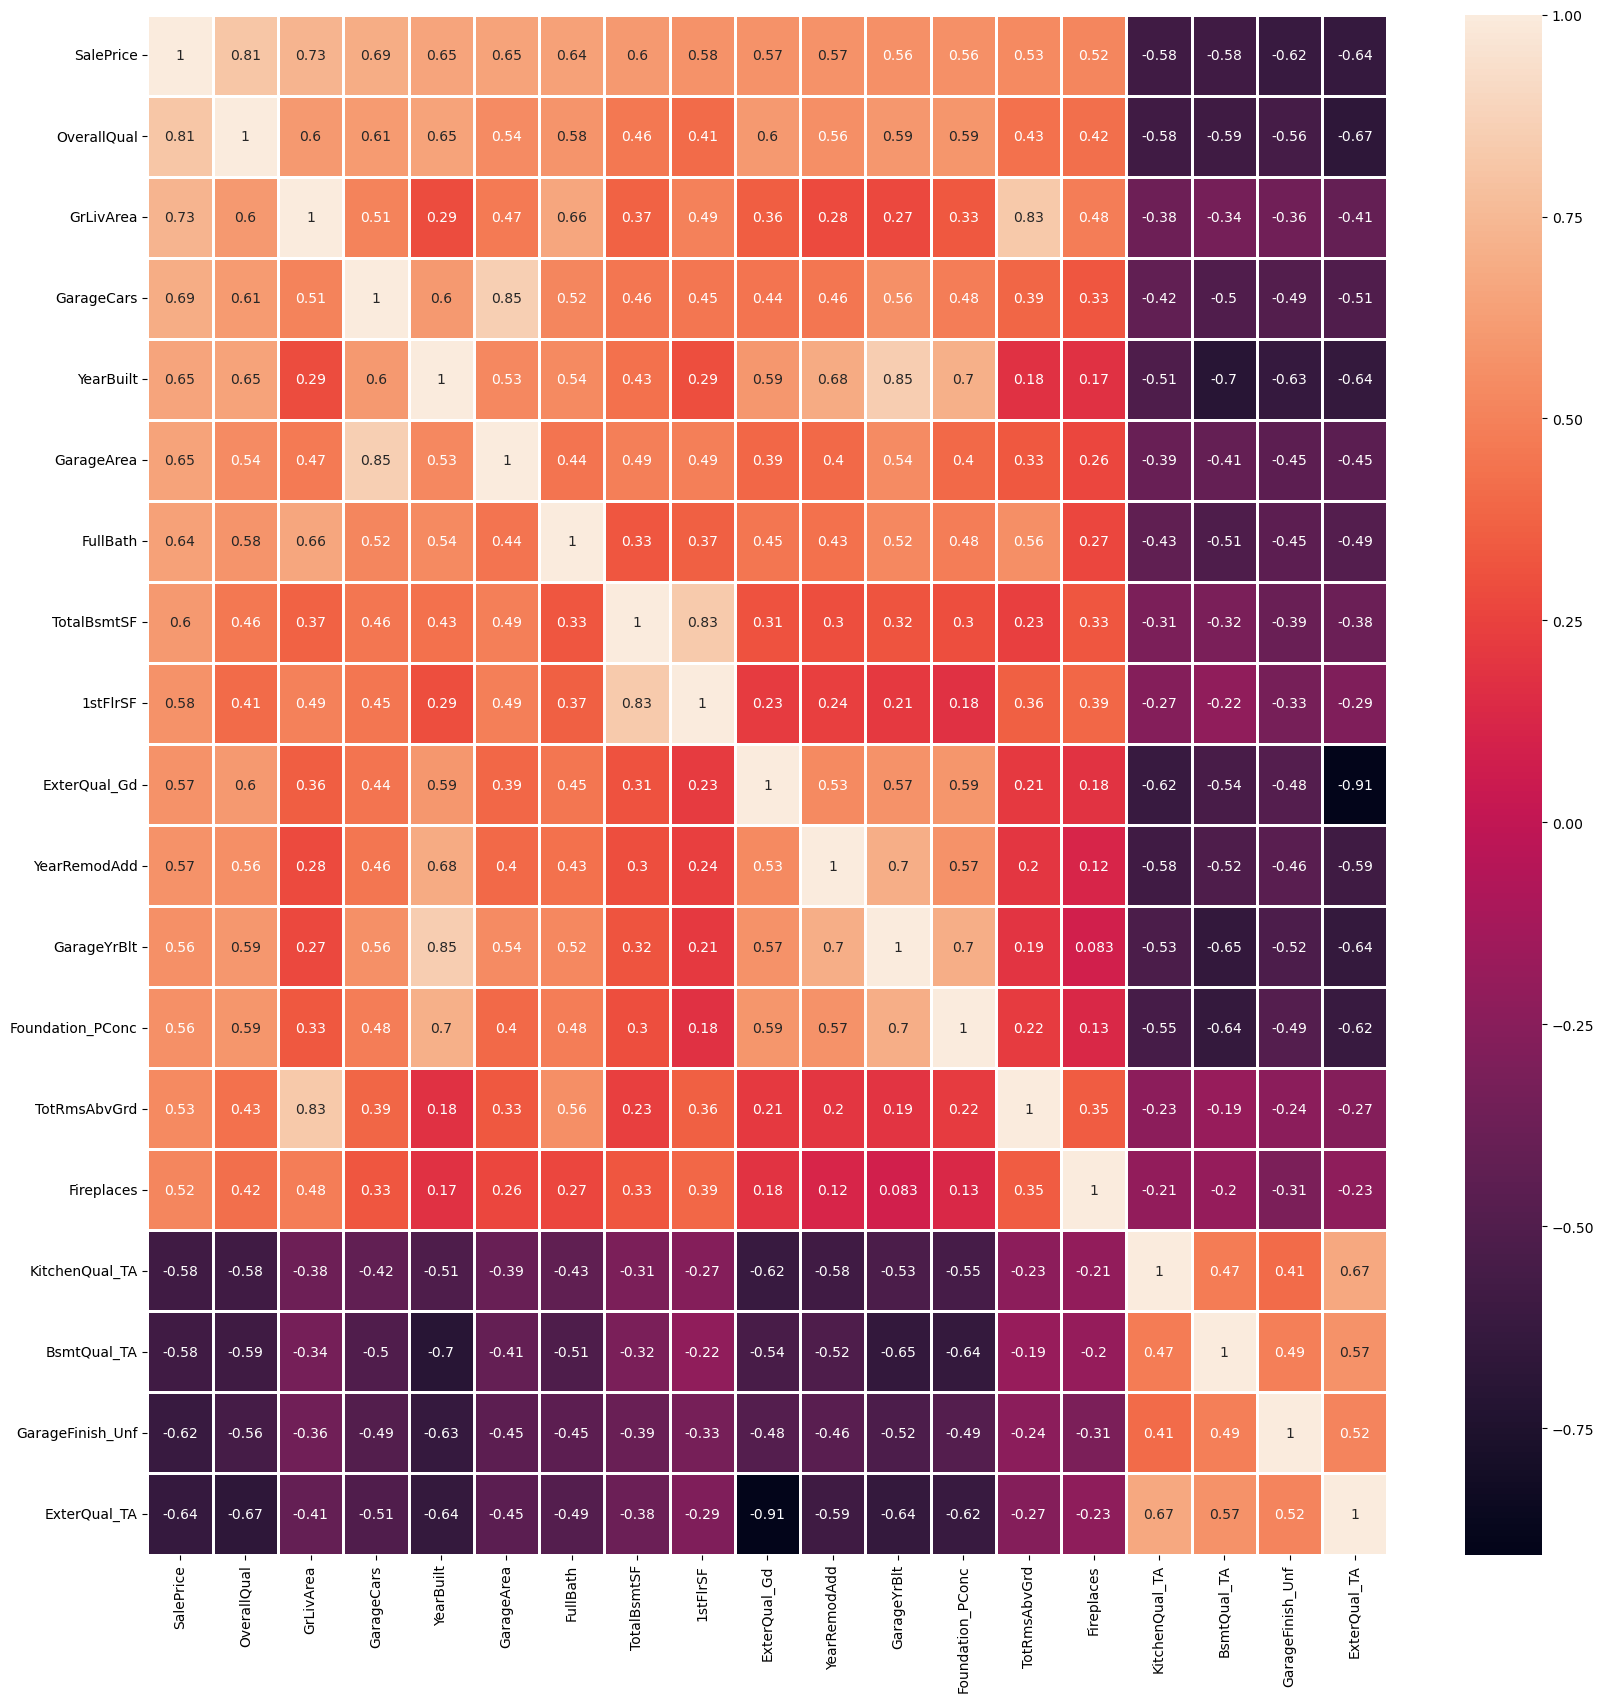

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(method='spearman'), annot=True, linewidths=1)

In [58]:
# 건축연도와 관계가 높으면 시설과 연관성이있으므로
ExterQual_TA - ExterQual_Gd -0.91
BsmtQual_TA - YearBuilt -0.7
BsmtQual_TA - YearBuilt 0.7
TotRmsAbvGrd - GrLivArea 0.83

SyntaxError: invalid syntax (855517413.py, line 4)

In [59]:
### 여기서 어떤단계???
final_df = final_df.drop(['BsmtQual_TA', 'TotRmsAbvGrd','ExterQual_Gd'], axis=1)

In [60]:
# 컬럼개수가 다르기때문에 새로 홀드해야함.
X2 = final_df.drop('SalePrice', axis=1)
y2 = final_df['SalePrice']

In [61]:
X2

,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,TotalBsmtSF,1stFlrSF,YearRemodAdd,GarageYrBlt,Foundation_PConc,Fireplaces,KitchenQual_TA,GarageFinish_Unf,ExterQual_TA
0,7,1710,2,2003,548,2,856,856,2003,2003.0,True,0,False,False,False
1,6,1262,2,1976,460,2,1262,1262,1976,1976.0,False,1,True,False,True
2,7,1786,2,2001,608,2,920,920,2002,2001.0,True,1,False,False,False
3,7,1717,3,1915,642,1,756,961,1970,1998.0,False,1,False,True,True
4,8,2198,3,2000,836,2,1145,1145,2000,2000.0,True,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,1999,460,2,953,953,2000,1999.0,True,1,True,False,True
1456,6,2073,2,1978,500,2,1542,2073,1988,1978.0,False,2,True,True,True
1457,7,2340,1,1941,252,2,1152,1188,2006,1941.0,False,2,False,False,False
1458,5,1078,1,1950,240,1,1078,1078,1996,1950.0,False,0,False,True,True


In [62]:
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [63]:
# 컬럼개수가 다르기때문에 새로 홀드해야함.
rs2 = RobustScaler()
rs2_X2_tarin = rs2.fit_transform(X2_train)
rs2_X2_valid = rs2.transform(X2_valid)

In [64]:
rs2_X2_tarin = rs2_X2_tarin.astype('float32')
rs2_X2_valid = rs2_X2_valid.astype('float32')

In [65]:
inputs = Input(shape=(rs2_X2_tarin.shape[1], ))
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1)(x)
corr_select_model = Model(inputs=inputs, outputs=outputs)
corr_select_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
corr_select_model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_path = "./model/iowa_corr_select_model_best.keras"
check_point = ModelCheckpoint(filepath=model_path, monitor='val_loss', save_best_only=True, verbose=1)
corr_select_model_history = corr_select_model.fit(rs2_X2_tarin, y2_train, epochs=1000, batch_size=32,
                                   validation_data=(rs2_X2_valid, y2_valid),
                                   callbacks=[early_stop, check_point],
                                   verbose=1)

Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 39208615936.0000 - root_mean_squared_error: 197998.5625
Epoch 1: val_loss improved from inf to 39380488192.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 39199043584.0000 - root_mean_squared_error: 197974.7344 - val_loss: 39380488192.0000 - val_root_mean_squared_error: 198445.1719
Epoch 2/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38418161664.0000 - root_mean_squared_error: 195989.1562
Epoch 2: val_loss improved from 39380488192.00000 to 39379845120.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 38446891008.0000 - root_mean_squared_error: 196063.2188 - val_loss: 39379845120.0000 - val_root_mean_squared_error: 198443.5469
Epoch 3/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38531788800.0000 - root_mean_squared_error: 196226.1562
Epoch 3: val_loss improved from 39379845120.00000 to 

Epoch 18/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38325678080.0000 - root_mean_squared_error: 195726.2344
Epoch 18: val_loss improved from 38976364544.00000 to 38901272576.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 38331830272.0000 - root_mean_squared_error: 195749.4844 - val_loss: 38901272576.0000 - val_root_mean_squared_error: 197234.0469
Epoch 19/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38603612160.0000 - root_mean_squared_error: 196414.1094
Epoch 19: val_loss improved from 38901272576.00000 to 38815162368.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 38565335040.0000 - root_mean_squared_error: 196329.9219 - val_loss: 38815162368.0000 - val_root_mean_squared_error: 197015.6406
Epoch 20/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38349574144.0000 - root_mean_squared_error: 195797.5469
Epoch 20: val_loss improved from 388

Epoch 35/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 37135122432.0000 - root_mean_squared_error: 192658.5938
Epoch 35: val_loss improved from 36324380672.00000 to 36066598912.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 36930715648.0000 - root_mean_squared_error: 192130.3281 - val_loss: 36066598912.0000 - val_root_mean_squared_error: 189912.0781
Epoch 36/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 36671217664.0000 - root_mean_squared_error: 191435.6250
Epoch 36: val_loss improved from 36066598912.00000 to 35803947008.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 36599877632.0000 - root_mean_squared_error: 191251.5781 - val_loss: 35803947008.0000 - val_root_mean_squared_error: 189219.3125
Epoch 37/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36223561728.0000 - root_mean_squared_error: 190217.6250
Epoch 37: val_loss improved from 35

Epoch 52/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29288570880.0000 - root_mean_squared_error: 171109.0000
Epoch 52: val_loss improved from 30641709056.00000 to 30224844800.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29328203776.0000 - root_mean_squared_error: 171225.9688 - val_loss: 30224844800.0000 - val_root_mean_squared_error: 173852.9375
Epoch 53/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30976987136.0000 - root_mean_squared_error: 175926.8438
Epoch 53: val_loss improved from 30224844800.00000 to 29807308800.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30807099392.0000 - root_mean_squared_error: 175451.2500 - val_loss: 29807308800.0000 - val_root_mean_squared_error: 172647.9375
Epoch 54/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30810738688.0000 - root_mean_squared_error: 175488.2188
Epoch 54: val_loss improved from 29

Epoch 69/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23954085888.0000 - root_mean_squared_error: 154599.6094
Epoch 69: val_loss improved from 22905964544.00000 to 22431637504.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23903969280.0000 - root_mean_squared_error: 154440.0000 - val_loss: 22431637504.0000 - val_root_mean_squared_error: 149771.9531
Epoch 70/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24252184576.0000 - root_mean_squared_error: 155645.4844
Epoch 70: val_loss improved from 22431637504.00000 to 21947717632.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23904671744.0000 - root_mean_squared_error: 154522.2031 - val_loss: 21947717632.0000 - val_root_mean_squared_error: 148147.6250
Epoch 71/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21466230784.0000 - root_mean_squared_error: 146488.0469
Epoch 71: val_loss improved from 21

Epoch 86/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14866530304.0000 - root_mean_squared_error: 121875.8203
Epoch 86: val_loss improved from 15176953856.00000 to 14763497472.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 14985559040.0000 - root_mean_squared_error: 122371.4453 - val_loss: 14763497472.0000 - val_root_mean_squared_error: 121505.1328
Epoch 87/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15236937728.0000 - root_mean_squared_error: 123422.1484
Epoch 87: val_loss improved from 14763497472.00000 to 14362297344.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 15159192576.0000 - root_mean_squared_error: 123106.8828 - val_loss: 14362297344.0000 - val_root_mean_squared_error: 119842.8047
Epoch 88/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15111164928.0000 - root_mean_squared_error: 122877.5078
Epoch 88: val_loss improved from 14

Epoch 103/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9922332672.0000 - root_mean_squared_error: 99593.7031
Epoch 103: val_loss improved from 9309395968.00000 to 9032442880.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9927271424.0000 - root_mean_squared_error: 99620.0078 - val_loss: 9032442880.0000 - val_root_mean_squared_error: 95039.1641
Epoch 104/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10409225216.0000 - root_mean_squared_error: 101963.9531
Epoch 104: val_loss improved from 9032442880.00000 to 8776498176.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10318048256.0000 - root_mean_squared_error: 101525.2344 - val_loss: 8776498176.0000 - val_root_mean_squared_error: 93682.9609
Epoch 105/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10090096640.0000 - root_mean_squared_error: 100397.6484
Epoch 105: val_loss improved from 87764981

Epoch 120/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8454416896.0000 - root_mean_squared_error: 91908.9141
Epoch 120: val_loss improved from 5889740288.00000 to 5759796224.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8432084992.0000 - root_mean_squared_error: 91788.4844 - val_loss: 5759796224.0000 - val_root_mean_squared_error: 75893.3203
Epoch 121/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7619117568.0000 - root_mean_squared_error: 87270.7578
Epoch 121: val_loss improved from 5759796224.00000 to 5637591040.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7623219712.0000 - root_mean_squared_error: 87297.1953 - val_loss: 5637591040.0000 - val_root_mean_squared_error: 75083.8906
Epoch 122/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8394694144.0000 - root_mean_squared_error: 91501.7422
Epoch 122: val_loss improved from 5637591040.000

Epoch 137/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7852915200.0000 - root_mean_squared_error: 88418.7344
Epoch 137: val_loss improved from 4322839552.00000 to 4273895168.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7675028992.0000 - root_mean_squared_error: 87446.6016 - val_loss: 4273895168.0000 - val_root_mean_squared_error: 65375.0352
Epoch 138/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7141401088.0000 - root_mean_squared_error: 84475.6328
Epoch 138: val_loss improved from 4273895168.00000 to 4210575872.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7109095936.0000 - root_mean_squared_error: 84286.3672 - val_loss: 4210575872.0000 - val_root_mean_squared_error: 64888.9492
Epoch 139/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6004496896.0000 - root_mean_squared_error: 77412.6328
Epoch 139: val_loss improved from 4210575872.000

Epoch 154/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6295609344.0000 - root_mean_squared_error: 79239.3984
Epoch 154: val_loss improved from 3712091648.00000 to 3688603136.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6318640640.0000 - root_mean_squared_error: 79388.7969 - val_loss: 3688603136.0000 - val_root_mean_squared_error: 60733.8711
Epoch 155/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5407872000.0000 - root_mean_squared_error: 73468.7578
Epoch 155: val_loss improved from 3688603136.00000 to 3662241280.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5544669184.0000 - root_mean_squared_error: 74390.2891 - val_loss: 3662241280.0000 - val_root_mean_squared_error: 60516.4531
Epoch 156/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6804265472.0000 - root_mean_squared_error: 82194.1328
Epoch 156: val_loss improved from 3662241280.000

24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5262045184.0000 - root_mean_squared_error: 72427.4922
Epoch 171: val_loss improved from 3497170944.00000 to 3490506240.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5464413184.0000 - root_mean_squared_error: 73806.8438 - val_loss: 3490506240.0000 - val_root_mean_squared_error: 59080.5039
Epoch 172/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6780793856.0000 - root_mean_squared_error: 82188.7891
Epoch 172: val_loss improved from 3490506240.00000 to 3462008064.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6642107392.0000 - root_mean_squared_error: 81358.5469 - val_loss: 3462008064.0000 - val_root_mean_squared_error: 58838.8320
Epoch 173/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6933318656.0000 - root_mean_squared_error: 83193.0703
Epoch 173: val_loss improved from 3462008064.00000 to 345367756

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5616169472.0000 - root_mean_squared_error: 74929.1953 - val_loss: 3326767360.0000 - val_root_mean_squared_error: 57678.1367
Epoch 189/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5722224128.0000 - root_mean_squared_error: 75478.6797
Epoch 189: val_loss improved from 3326767360.00000 to 3317106432.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5788927488.0000 - root_mean_squared_error: 75948.7812 - val_loss: 3317106432.0000 - val_root_mean_squared_error: 57594.3281
Epoch 190/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5175226880.0000 - root_mean_squared_error: 71881.3438
Epoch 190: val_loss improved from 3317106432.00000 to 3297201408.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5362953216.0000 - root_mean_squared_error: 73156.8906 - val_loss: 3297201408.0000 - val_root_mean_squared_error: 5742

23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5985566720.0000 - root_mean_squared_error: 77188.0703
Epoch 206: val_loss did not improve from 3191148032.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6072491008.0000 - root_mean_squared_error: 77796.3047 - val_loss: 3194959616.0000 - val_root_mean_squared_error: 56523.9727
Epoch 207/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6017705472.0000 - root_mean_squared_error: 77531.0234
Epoch 207: val_loss did not improve from 3191148032.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6037754880.0000 - root_mean_squared_error: 77670.1719 - val_loss: 3200307200.0000 - val_root_mean_squared_error: 56571.2578
Epoch 208/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5413966848.0000 - root_mean_squared_error: 73489.7422
Epoch 208: val_loss improved from 3191148032.00000 to 3178407168.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5475868672.0000 - root_mean_s

31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6127918592.0000 - root_mean_squared_error: 77987.3672
Epoch 224: val_loss did not improve from 3088174592.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6086846976.0000 - root_mean_squared_error: 77735.1484 - val_loss: 3097611520.0000 - val_root_mean_squared_error: 55656.1875
Epoch 225/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5983820288.0000 - root_mean_squared_error: 77213.2812
Epoch 225: val_loss did not improve from 3088174592.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6002761216.0000 - root_mean_squared_error: 77336.9688 - val_loss: 3094057984.0000 - val_root_mean_squared_error: 55624.2578
Epoch 226/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5487384064.0000 - root_mean_squared_error: 73971.3125
Epoch 226: val_loss did not improve from 3088174592.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5586131968.0000 - root_mean_squared_error: 74637.2188 - val_loss: 3089234944.0000 - val_root_mean_sq

28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4963552768.0000 - root_mean_squared_error: 70437.2891
Epoch 242: val_loss improved from 2994304000.00000 to 2983395328.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5035145216.0000 - root_mean_squared_error: 70930.2969 - val_loss: 2983395328.0000 - val_root_mean_squared_error: 54620.4688
Epoch 243/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5277398528.0000 - root_mean_squared_error: 72574.7109
Epoch 243: val_loss did not improve from 2983395328.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5272237056.0000 - root_mean_squared_error: 72545.5469 - val_loss: 2984842496.0000 - val_root_mean_squared_error: 54633.7148
Epoch 244/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6428541440.0000 - root_mean_squared_error: 79978.8672
Epoch 244: val_loss improved from 2983395328.00000 to 2975173120.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/3

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5599760896.0000 - root_mean_squared_error: 74740.7109 - val_loss: 2883388928.0000 - val_root_mean_squared_error: 53697.1953
Epoch 260/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6877996032.0000 - root_mean_squared_error: 82377.6484
Epoch 260: val_loss did not improve from 2883388928.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6775667200.0000 - root_mean_squared_error: 81783.7188 - val_loss: 2894019840.0000 - val_root_mean_squared_error: 53796.0938
Epoch 261/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8139966464.0000 - root_mean_squared_error: 89143.0625
Epoch 261: val_loss did not improve from 2883388928.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7746042368.0000 - root_mean_squared_error: 87099.8359 - val_loss: 2900760064.0000 - val_root_mean_squared_error: 53858.7031
Epoch 262/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5553990144.0000 - root_mean_squared_error: 74318.6328
Epoch 262: val_loss 

Epoch 278/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5769012224.0000 - root_mean_squared_error: 75763.3750
Epoch 278: val_loss improved from 2833622272.00000 to 2814686720.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5694871552.0000 - root_mean_squared_error: 75314.5078 - val_loss: 2814686720.0000 - val_root_mean_squared_error: 53053.6211
Epoch 279/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4414441472.0000 - root_mean_squared_error: 66301.7344
Epoch 279: val_loss improved from 2814686720.00000 to 2805792512.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4713358848.0000 - root_mean_squared_error: 68479.8047 - val_loss: 2805792512.0000 - val_root_mean_squared_error: 52969.7305
Epoch 280/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5689293312.0000 - root_mean_squared_error: 75379.9297
Epoch 280: val_loss did not improve from 2805792

Epoch 296/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5722062848.0000 - root_mean_squared_error: 75583.0625
Epoch 296: val_loss improved from 2715259904.00000 to 2708394496.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5673700864.0000 - root_mean_squared_error: 75265.0391 - val_loss: 2708394496.0000 - val_root_mean_squared_error: 52042.2383
Epoch 297/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6430770688.0000 - root_mean_squared_error: 80042.6406
Epoch 297: val_loss improved from 2708394496.00000 to 2707895040.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6321160704.0000 - root_mean_squared_error: 79351.4531 - val_loss: 2707895040.0000 - val_root_mean_squared_error: 52037.4375
Epoch 298/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6132312064.0000 - root_mean_squared_error: 78067.3125
Epoch 298: val_loss improved from 2707895040.000

Epoch 314/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5597682176.0000 - root_mean_squared_error: 74550.5859
Epoch 314: val_loss did not improve from 2666358272.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5574999040.0000 - root_mean_squared_error: 74453.6250 - val_loss: 2668351488.0000 - val_root_mean_squared_error: 51656.0898
Epoch 315/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4918766080.0000 - root_mean_squared_error: 70070.0312
Epoch 315: val_loss improved from 2666358272.00000 to 2657209856.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4961831424.0000 - root_mean_squared_error: 70375.8047 - val_loss: 2657209856.0000 - val_root_mean_squared_error: 51548.1289
Epoch 316/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5659949056.0000 - root_mean_squared_error: 75100.9062
Epoch 316: val_loss did not improve from 2657209856.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5679812096.000

Epoch 333/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4846176768.0000 - root_mean_squared_error: 69441.0625
Epoch 333: val_loss improved from 2612395008.00000 to 2600911360.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4938220032.0000 - root_mean_squared_error: 70124.3906 - val_loss: 2600911360.0000 - val_root_mean_squared_error: 50999.1289
Epoch 334/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4215823872.0000 - root_mean_squared_error: 64834.8984
Epoch 334: val_loss improved from 2600911360.00000 to 2597326336.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4328045568.0000 - root_mean_squared_error: 65667.6641 - val_loss: 2597326336.0000 - val_root_mean_squared_error: 50963.9688
Epoch 335/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5255741952.0000 - root_mean_squared_error: 72428.5078
Epoch 335: val_loss improved from 2597326336.000

31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4829381120.0000 - root_mean_squared_error: 69384.6094
Epoch 351: val_loss did not improve from 2526783232.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4854253568.0000 - root_mean_squared_error: 69566.5234 - val_loss: 2557191168.0000 - val_root_mean_squared_error: 50568.6758
Epoch 352/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4792563712.0000 - root_mean_squared_error: 69111.1641
Epoch 352: val_loss did not improve from 2526783232.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4810236416.0000 - root_mean_squared_error: 69255.7656 - val_loss: 2556071936.0000 - val_root_mean_squared_error: 50557.6094
Epoch 353/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4975938048.0000 - root_mean_squared_error: 70419.5312
Epoch 353: val_loss did not improve from 2526783232.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4993946112.0000 - root_mean_squared_error: 70556.9062 - val_loss: 2538898176.0000 - val_root_mean_sq

In [ ]:
pred = corr_select_model.predict(rs2_X2_valid)
pred = pd.DataFrame(pred, columns=['pred'])
pred

In [ ]:
y2_valid = pd.DataFrame(y2_valid)
y2_valid_df = y2_valid.reset_index(drop=True)
final_result = y2_valid_df.join(pred)
final_result

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(final_result['SalePrice'], label='SalePrice')
plt.plot(final_result['pred'], label='pred')
plt.legend()
plt.show()
print(corr_select_model.evaluate(rs2_X2_valid, y2_valid))

In [ ]:
# 실제성능에대해서는 test 데이터에 돌려봐야 드러나